In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [10]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

# Arbitrary Imputation

In [12]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

<ipython-input-12-cb3531bd821d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_99'] = X_train['Age'].fillna(99)
<ipython-input-12-cb3531bd821d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_minus1'] = X_train['Age'].fillna(-1)
<ipython-input-12-cb3531bd821d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [13]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
844,17.0,8.6625,0,17.0,17.0,8.6625,8.6625
765,51.0,77.9583,1,51.0,51.0,77.9583,77.9583
693,25.0,7.2250,0,25.0,25.0,7.2250,7.2250
116,70.5,7.7500,0,70.5,70.5,7.7500,7.7500
806,39.0,0.0000,0,39.0,39.0,0.0000,0.0000


In [18]:
print('Original Age Variable Variance: ',X_train['Age'].var())
print('Age variance after 99 imputation : ',X_train['Age_99'].var())
print('Age variance after -1 imputation: ',X_train['Age_minus1'].var())
print()

print('Original Fare Variable Variance: ',X_train['Fare'].var())
print('Fare variance after 999 imputation : ',X_train['Fare_999'].var())
print('Fare variance after -1 imputation: ',X_train['Fare_minus1'].var())

Original Age Variable Variance:  204.3495133904614
Age variance after 99 imputation :  951.7275570187172
Age variance after -1 imputation:  318.0896202624484

Original Fare Variable Variance:  2448.197913706318
Fare variance after 999 imputation :  47219.20265217623
Fare variance after -1 imputation:  2378.5676784883503


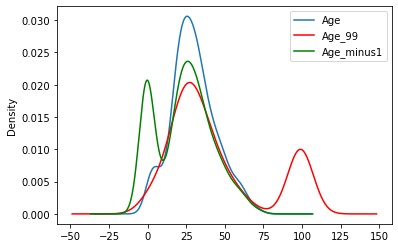

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax = ax)

X_train['Age_99'].plot(kind='kde',ax = ax,color = 'red')

X_train['Age_minus1'].plot(kind='kde',ax = ax,color = 'green')

line,label = ax.get_legend_handles_labels()
ax.legend(line,label,loc ='best') 

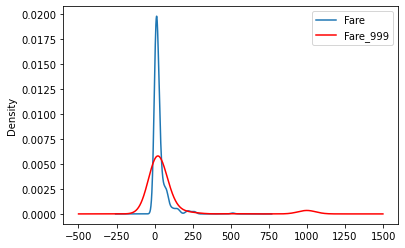

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax = ax)

X_train['Fare_999'].plot(kind='kde',ax = ax,color = 'red')

X_train['Fare_minus1'].plot(kind='kde',ax = ax,color = 'green')

line,label = ax.get_legend_handles_labels()
ax.legend(line,label,loc ='best') 

In [19]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [20]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


<AxesSubplot:>

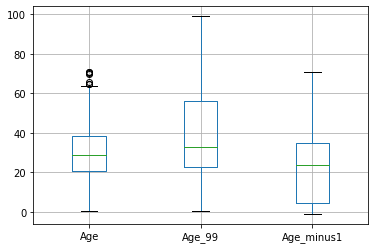

In [21]:
X_train[['Age','Age_99','Age_minus1']].boxplot()

<AxesSubplot:>

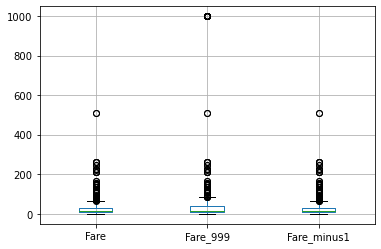

In [22]:
X_train[['Fare','Fare_999','Fare_minus1']].boxplot()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [24]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [25]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [26]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [27]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [28]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

# Mean/Median imputation

In [ ]:
mean_age =X_train['Age'].mean()
median_age =X_train['Age'].median() 

mean_fare =X_train['Fare'].mean() 
median_fare =X_train['Age'].median() 

In [ ]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [ ]:
X_train.sample(5)

In [ ]:
print('Original Age Variable Variance: ',X_train['Age'].var())
print('Age variance after mean imputation : ',X_train['Age_mean'].var())
print('Age variance after median imputation: ',X_train['Age_median'].var())
print()

print('Original Fare Variable Variance: ',X_train['Fare'].var())
print('Fare variance after mean imputation : ',X_train['Fare_mean'].var())
print('Fare variance after median imputation: ',X_train['Fare_median'].var())

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax = ax)

X_train['Age_mean'].plot(kind='kde',ax = ax,color = 'red')

X_train['Age_median'].plot(kind='kde',ax = ax,color = 'green')

line,label = ax.get_legend_handles_labels()
ax.legend(line,label,loc ='best') 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax = ax)

X_train['Fare_mean'].plot(kind='kde',ax = ax,color = 'red')

X_train['Fare_median'].plot(kind='kde',ax = ax,color = 'green')

line,label = ax.get_legend_handles_labels()
ax.legend(line,label,loc ='best') 

In [ ]:
X_train.cov()

In [ ]:
X_train.corr()

In [ ]:
X_train[['Age','Age_mean','Age_median']].boxplot()

In [ ]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

In [ ]:
trf.named_transformers_['imputer1'].statistics_

In [ ]:
trf.named_transformers_['imputer2'].statistics_

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [ ]:
X_train

In [ ]:
pd.DataFrame(X_train,columns=['Age','Fare','Family'])